In [2]:
#################### PUNTO 1 ######################
############### a. 
import pandas as pd 
import numpy as np 
# Lectura de los datos 2D 
data_2d = pd.read_csv("data_2d.csv") 
data_3d = pd.read_csv("data_3d.csv")
print("Datos 2D:") 
print(data_2d.head())
print("Datos 3D")
print(data_3d.head())

Datos 2D:
          x         y  label
0 -0.542815  0.498673      1
1  0.141489 -0.753147      1
2 -0.289300  0.825718      1
3 -1.213340 -0.214456      1
4  0.632968 -0.433370      1
Datos 3D
          x         y         z  label
0 -0.374414  0.283797  0.359075      1
1 -0.499690  0.237449 -0.934250      1
2 -0.101329 -0.567124 -0.403850      1
3 -0.638039  0.276813  0.276937      1
4 -0.345600  0.187791  0.130636      1


In [ ]:
################ b.
# Estudio estadistico de los datos 2D
print("Estudio estadistico de los datos 2D:")
print(data_2d.describe())
print("---------------------------------------------")
# Estudio estadistico de los datos 3D
print("Estudio estadistico de los datos 3D:")
print(data_3d.describe())

Estudio estadistico de los datos 2D:
                x           y      label
count  500.000000  500.000000  500.00000
mean    -0.021084   -0.018481    3.00000
std      2.709409    2.739144    1.41563
min     -4.583528   -4.136309    1.00000
25%     -2.881481   -2.852890    2.00000
50%      0.063694   -0.063037    3.00000
75%      2.794664    2.877321    4.00000
max      4.166031    4.479313    5.00000
---------------------------------------------
Estudio estadistico de los datos 3D:
                x           y           z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.007135    0.012954    1.210683    3.00000
std      2.767796    2.706724    1.549598    1.41563
min     -4.076058   -4.533494   -1.900689    1.00000
25%     -2.846464   -2.810216   -0.068054    2.00000
50%      0.025454    0.098319    0.415523    3.00000
75%      2.903804    2.814452    2.868339    4.00000
max      4.058567    4.185694    4.135517    5.00000


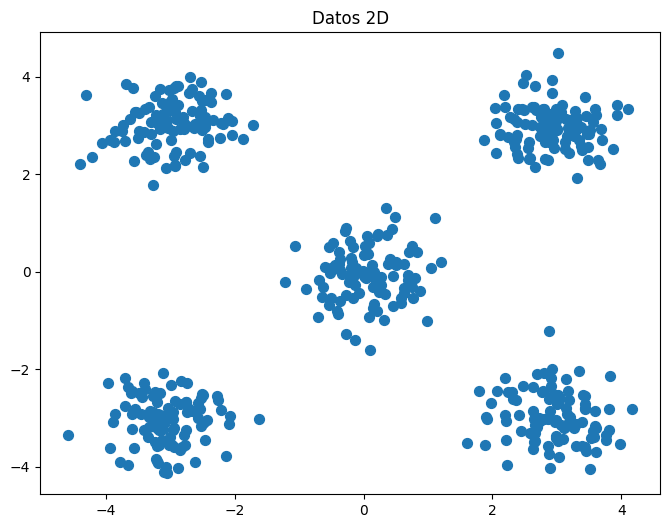

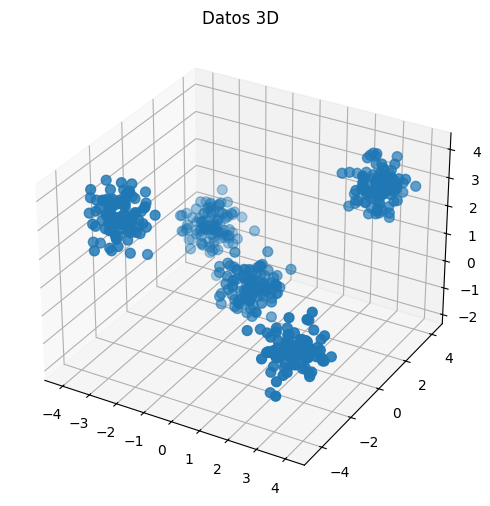

In [ ]:
################ c.
# importar libreria
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Gráfica de los datos 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d["x"], data_2d["y"], s=50)
plt.title("Datos 2D")
# Gráfica de los datos 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d["x"], data_3d["y"], data_3d["z"], s=50)
ax.set_title("Datos 3D")
plt.show()

In [ ]:
####################### d.

#### 1. Inicializa los centroides de manera aleatoria
import numpy as np  # Importamos NumPy para cálculos matemáticos y manejo de arreglos
import matplotlib.pyplot as plt  # Importamos Matplotlib para graficar

def inicializar_centroides(puntos, k):
    """Inicializa k centroides de manera aleatoria dentro del dataset."""
    np.random.seed(42)  # Fijar semilla para reproducibilidad
    indices = np.random.choice(len(puntos), k, replace=False)  # Elegimos k índices aleatorios sin repetición
    return puntos[indices]  # Retornamos los puntos seleccionados como centroides iniciales

#### 2. Asigna cada punto al centroide más cercano
def distancia(p1, p2, metrica='euclidiana'):
    """Calcula la distancia entre dos puntos según la métrica elegida."""
    if metrica == 'euclidiana':  # Distancia Euclidiana (norma L2)
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':  # Distancia Manhattan (norma L1)
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':  # Distancia Chebyshev (máxima diferencia en cualquier dimensión)
        return np.max(np.abs(p1 - p2))
    else:
        raise ValueError("Métrica no soportada")  # Manejo de error si la métrica no es válida

def asignar_a_centroides(puntos, centroides, metrica='euclidiana'):
    """Asigna cada punto al centroide más cercano según la métrica seleccionada."""
    asignaciones = np.zeros(len(puntos), dtype=int)  # Array para almacenar asignaciones
    for i, punto in enumerate(puntos):
        distancias = [distancia(punto, centroide, metrica) for centroide in centroides]  # Distancias a los centroides
        asignaciones[i] = np.argmin(distancias)  # Asigna el índice del centroide más cercano
    return asignaciones  # Devolvemos un array con los índices de los centroides más cercanos

#### 3. Actualiza los centroides como el promedio de los puntos asignados
def actualizar_centroides(puntos, asignaciones, k):
    """Recalcula los centroides como la media de los puntos asignados a cada uno."""
    dimensiones = puntos.shape[1]  # Número de dimensiones
    nuevos_centroides = np.zeros((k, dimensiones))  # Inicializamos el array de centroides de k filas y dimensiones columnas
    for i in range(k):  # Iteramos sobre cada cluster
        cluster_puntos = puntos[asignaciones == i]  # Filtramos los puntos asignados al cluster i
        if len(cluster_puntos) > 0:
            nuevos_centroides[i] = cluster_puntos.mean(axis=0)  # Calculamos el nuevo centroide como el promedio
        else:
            nuevos_centroides[i] = puntos[np.random.randint(len(puntos))]  # Si no hay puntos, elegimos un punto aleatorio
    return nuevos_centroides  # Retornamos los nuevos centroides

#### 4. Repite los pasos 2 y 3 hasta que los centroides no cambien o se alcance un número máximo de iteraciones
def kmeans(puntos, k, max_iter=100, metrica='euclidiana'):
    """Implementación del algoritmo K-Means."""
    centroides = inicializar_centroides(puntos, k)  # Inicializamos los centroides aleatoriamente
    for _ in range(max_iter):  # Número máximo de iteraciones
        asignaciones = asignar_a_centroides(puntos, centroides, metrica)  # Asignamos puntos a los centroides
        nuevos_centroides = actualizar_centroides(puntos, asignaciones, k)  # Calculamos los nuevos centroides
        if np.allclose(centroides, nuevos_centroides):  # Si no cambian, terminamos
            break
        centroides = nuevos_centroides  # Actualizamos los centroides
    return asignaciones, centroides  # Retornamos las asignaciones y los centroides finales

# Generar datos aleatorios
np.random.seed(42)
puntos = np.random.rand(100, 2)  # 100 puntos en 2D entre 0 y 1

# Ejecutar K-Means con datos aleatorios
k = 5  # Número de clusters
asignaciones, centroides = kmeans(puntos, k)

# Mostrar resultados
print("==============================================")
print("Los centroides finales son:\n", centroides)


Los centroides finales son:
 [[0.29316275 0.22208936]
 [0.52015512 0.81442596]
 [0.77412461 0.21215807]
 [0.13971558 0.7012317 ]
 [0.82727337 0.67912109]]


: 

In [ ]:
# Graficar resultados 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=asignaciones_2d, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroides_2d[:, 0], centroides_2d[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title("Clustering K-Means en Datos 2D")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

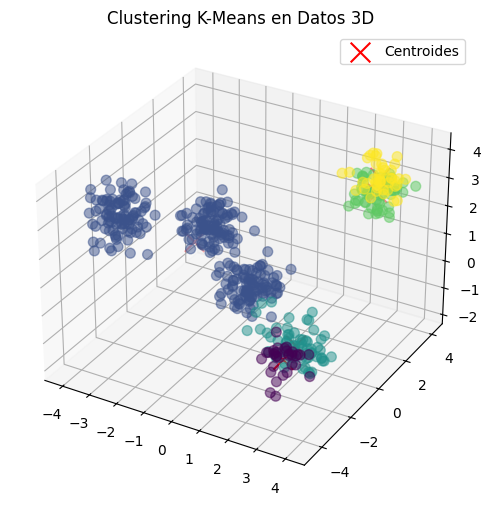

In [7]:
# Graficar resultados 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=asignaciones_3d, cmap='viridis', s=50, alpha=0.5)
ax.scatter(centroides_3d[:, 0], centroides_3d[:, 1], centroides_3d[:, 2], c='red', marker='x', s=200, label='Centroides')
ax.set_title("Clustering K-Means en Datos 3D")
plt.legend()
plt.show()

In [ ]:
#### e.
def calcular_inercia(puntos, asignaciones, centroides, q=2):
    """Calcula la inercia del clustering K-Means.
    
    Parámetros:
    - puntos: array con los datos originales.
    - asignaciones: array con los índices de los centroides asignados a cada punto.
    - centroides: array con las coordenadas de los centroides.
    - q: métrica de distancia, por defecto es la euclidiana (q=2).
    
    Retorna:
    - Inercia total del clustering.
    """
    inercia = 0
    for i in range(len(centroides)):  # Para cada cluster
        cluster_puntos = puntos[asignaciones == i]  # Puntos asignados al cluster i
        if len(cluster_puntos) > 0:
            distancias = np.sum(np.abs(cluster_puntos - centroides[i])**q, axis=1)  # ||x - μ_i||_q^q
            inercia += np.sum(distancias)  # Sumar distancias al total
    return inercia

# Calcular inercia para los datos 2D y 3D
inercia_2d = calcular_inercia(data_2d, asignaciones_2d, centroides_2d)
inercia_3d = calcular_inercia(data_3d, asignaciones_3d, centroides_3d)

print(f"Inercia en datos 2D: {inercia_2d}")
print(f"Inercia en datos 3D: {inercia_3d}")

Inercia en datos 2D: 2089.0129057743297
Inercia en datos 3D: 3269.486357429525


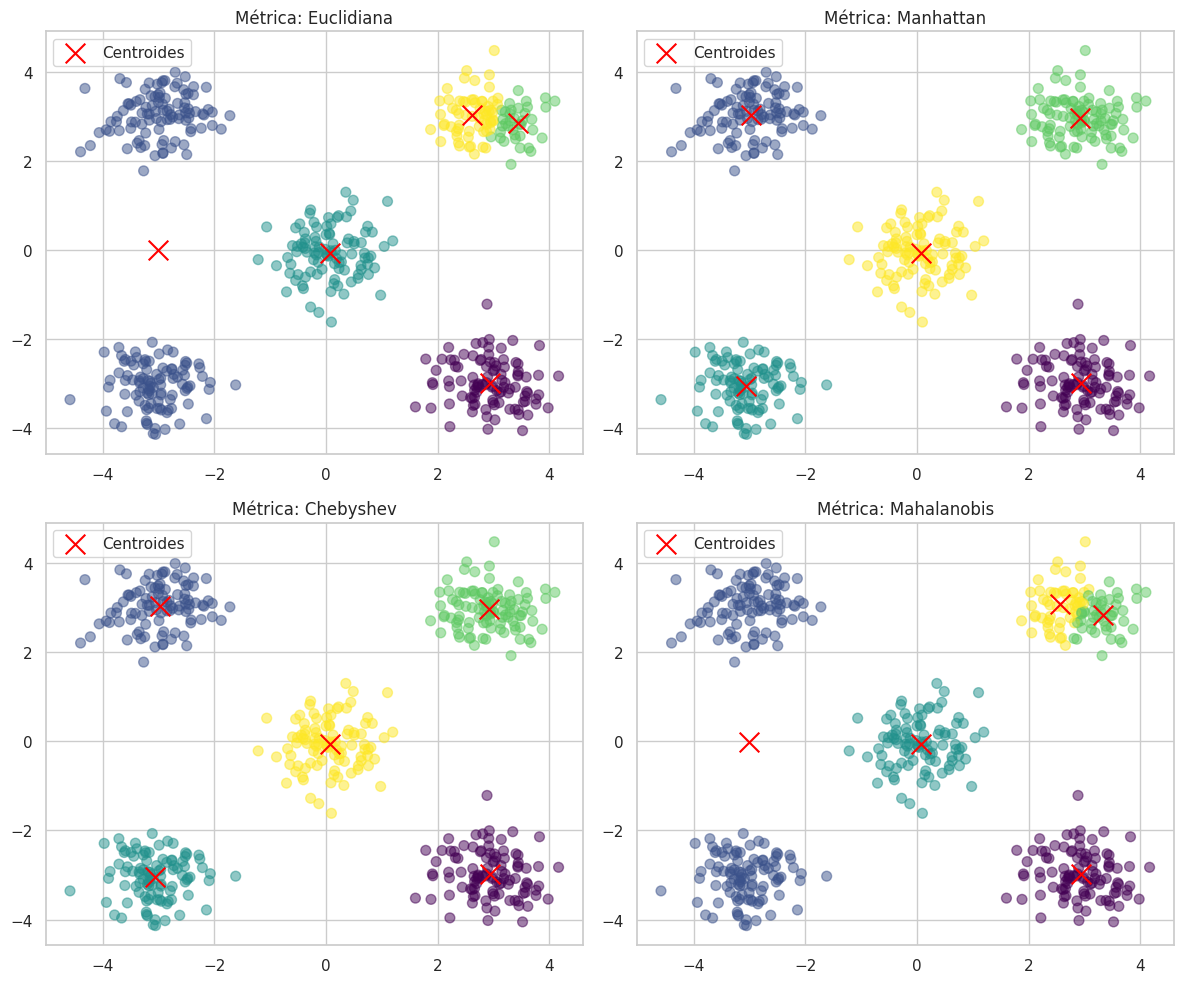

Centroides con métrica euclidiana:
[[ 2.936963 -2.979242]
 [-3.015784 -0.006699]
 [ 0.065435 -0.061648]
 [ 3.438024  2.843211]
 [ 2.621721  3.031583]]

Centroides con métrica manhattan:
[[ 2.936963 -2.979242]
 [-2.972411  3.040485]
 [-3.059157 -3.053884]
 [ 2.923753  2.961885]
 [ 0.065435 -0.061648]]

Centroides con métrica chebyshev:
[[ 2.936963 -2.979242]
 [-2.972411  3.040485]
 [-3.059157 -3.053884]
 [ 2.923753  2.961885]
 [ 0.065435 -0.061648]]

Centroides con métrica mahalanobis:
[[ 2.936963 -2.979242]
 [-3.015784 -0.006699]
 [ 0.065435 -0.061648]
 [ 3.34045   2.826373]
 [ 2.568789  3.077321]]



In [ ]:
#### f.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# Función para calcular la distancia según la métrica seleccionada
def calcular_distancia(p1, p2, metrica='euclidiana', A_inv=None):
    if metrica == 'euclidiana':
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':
        return np.max(np.abs(p1 - p2))
    elif metrica == 'mahalanobis':
        if A_inv is None:
            raise ValueError("Se necesita la matriz inversa de covarianza para Mahalanobis.")
        return mahalanobis(p1, p2, A_inv)
    else:
        raise ValueError("Métrica no soportada")

# Función para asignar puntos a los centroides
def asignar_a_centroides(puntos, centroides, metrica='euclidiana', A_inv=None):
    asignaciones = []
    for punto in puntos:
        distancias = [calcular_distancia(punto, centroide, metrica, A_inv) for centroide in centroides]
        asignaciones.append(np.argmin(distancias))
    return np.array(asignaciones)

# Función para ejecutar K-Means con diferentes métricas
def kmeans_experimento(puntos, k, metrica='euclidiana', max_iter=100):
    np.random.seed(42)
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    A_inv = None
    
    if metrica == 'mahalanobis':
        cov_matrix = np.cov(puntos.T)  # Matriz de covarianza
        A_inv = np.linalg.inv(cov_matrix)  # Matriz inversa para Mahalanobis
    
    for _ in range(max_iter):
        asignaciones = asignar_a_centroides(puntos, centroides, metrica, A_inv)
        nuevos_centroides = np.array([
    puntos[asignaciones == i, :3].mean(axis=0) if len(puntos[asignaciones == i]) > 0 
    else puntos[np.random.randint(len(puntos)), :3] 
    for i in range(k)])
        if np.allclose(centroides, nuevos_centroides):
            break
        centroides = nuevos_centroides
    
    return asignaciones, centroides

# Cargar datos 2D
data_2d = pd.read_csv("data_2d.csv", usecols=[0, 1]).values  # Solo las primeras 2 columnas
k = 5
metricas = ['euclidiana', 'manhattan', 'chebyshev', 'mahalanobis']

# Graficar los resultados para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, metrica in enumerate(metricas):
    asignaciones, centroides = kmeans_experimento(data_2d, k, metrica)
    axes[i].scatter(data_2d[:, 0], data_2d[:, 1], c=asignaciones, cmap='viridis', s=50, alpha=0.5)
    axes[i].scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, label='Centroides')
    axes[i].set_title(f"Métrica: {metrica.capitalize()}")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Diccionario para almacenar los centroides de cada métrica
centroides_resultados = {}

# Ejecutar K-Means y guardar los centroides
for metrica in metricas:
    _, centroides = kmeans_experimento(data_2d, k, metrica)
    centroides_resultados[metrica] = centroides

# Imprimir los centroides correctamente
for metrica, centroides in centroides_resultados.items():
    print(f"Centroides con métrica {metrica}:")
    print(np.array2string(centroides, precision=6, suppress_small=True))
    print()


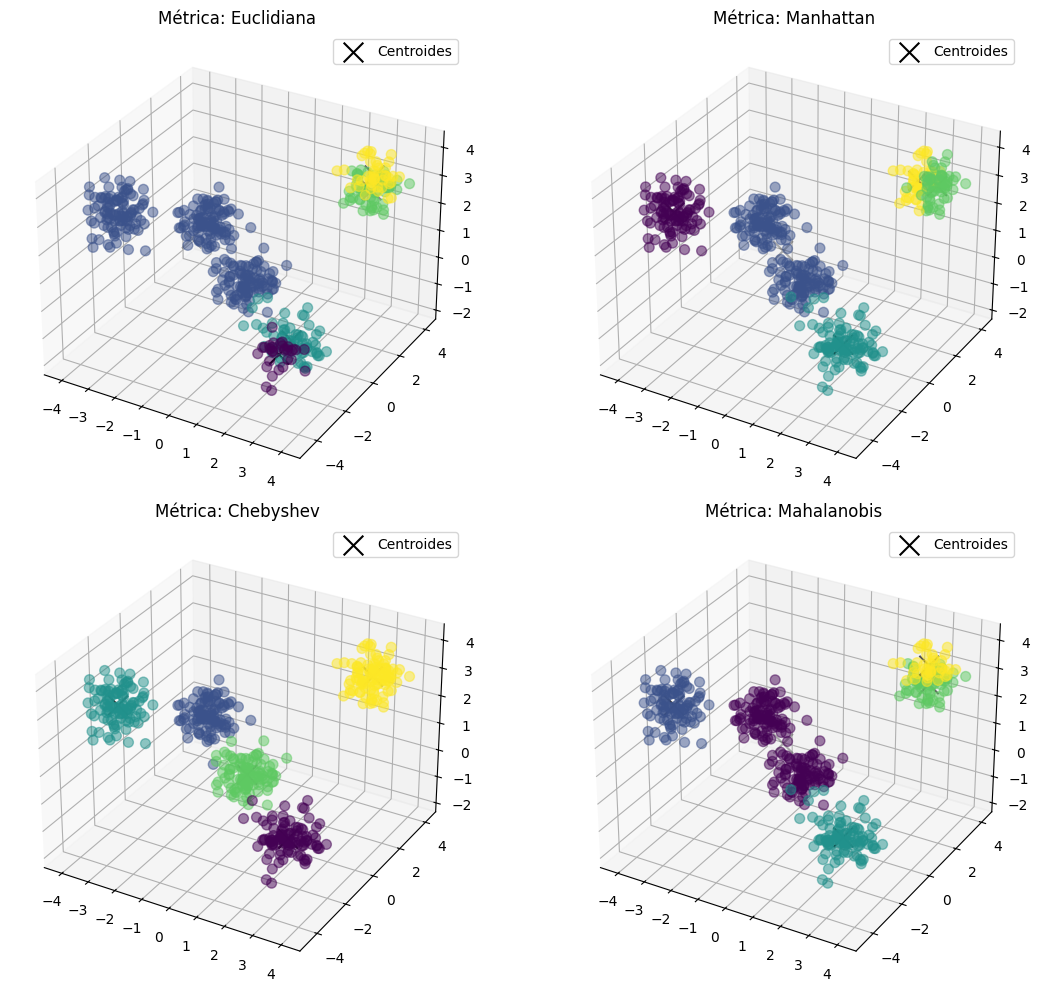

Centroides con métrica euclidiana:
[[ 3.03282978 -3.49574741 -0.02028615]
 [-2.04086586  0.00969758  0.99764896]
 [ 3.04422371 -2.67840194  0.07409187]
 [ 2.9102474   3.16839666  2.71074531]
 [ 3.15058187  2.85247987  3.4477961 ]]

Centroides con métrica manhattan:
[[-3.03285651 -2.95370408  2.98924569]
 [-1.54930658  1.52106957 -0.00927351]
 [ 3.01424499 -2.91982982  0.04600947]
 [ 3.33020816  2.97478168  3.06114625]
 [ 2.59947887  3.10178539  3.00045185]]

Centroides con métrica chebyshev:
[[ 3.07942621e+00 -2.97471961e+00  4.20416642e-02]
 [-3.04897992e+00  2.94553160e+00  1.35689197e-03]
 [-3.03285651e+00 -2.95370408e+00  2.98924569e+00]
 [ 2.20920755e-02  1.82703414e-02 -1.42776097e-02]
 [ 3.01599457e+00  3.02939327e+00  3.03504766e+00]]

Centroides con métrica mahalanobis:
[[-1.54930658  1.52106957 -0.00927351]
 [-3.03285651 -2.95370408  2.98924569]
 [ 3.01424499 -2.91982982  0.04600947]
 [ 2.97754253  3.11894573  2.70585131]
 [ 3.06909499  2.9057256   3.48965214]]



In [ ]:
#### f.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import mahalanobis

# Función para calcular la distancia según la métrica seleccionada
def calcular_distancia(p1, p2, metrica='euclidiana', A_inv=None):
    if metrica == 'euclidiana':
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':
        return np.max(np.abs(p1 - p2))
    elif metrica == 'mahalanobis':
        if A_inv is None:
            raise ValueError("Se necesita la matriz inversa de covarianza para Mahalanobis.")
        return mahalanobis(p1, p2, A_inv)
    else:
        raise ValueError("Métrica no soportada")

# Función para asignar puntos a los centroides
def asignar_a_centroides(puntos, centroides, metrica='euclidiana', A_inv=None):
    asignaciones = np.zeros(len(puntos), dtype=int)
    for i, punto in enumerate(puntos):
        distancias = [calcular_distancia(punto, centroide, metrica, A_inv) for centroide in centroides]
        asignaciones[i] = np.argmin(distancias)
    return asignaciones

# Función para ejecutar K-Means con diferentes métricas
def kmeans_experimento(puntos, k, metrica='euclidiana', max_iter=100):
    np.random.seed(42)
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    A_inv = None
    
    if metrica == 'mahalanobis':
        cov_matrix = np.cov(puntos.T)  
        if np.linalg.det(cov_matrix) == 0:
            raise ValueError("La matriz de covarianza no es invertible.")
        A_inv = np.linalg.inv(cov_matrix)  
    
    for _ in range(max_iter):
        asignaciones = asignar_a_centroides(puntos, centroides, metrica, A_inv)
        nuevos_centroides = np.array([
            puntos[asignaciones == i].mean(axis=0) if len(puntos[asignaciones == i]) > 0 
            else puntos[np.random.randint(len(puntos))]
            for i in range(k)
        ])
        
        if np.allclose(centroides, nuevos_centroides):
            break
        centroides = nuevos_centroides
    
    return asignaciones, centroides

# Cargar datos 3D
data_3d = pd.read_csv("data_3d.csv", usecols=[0, 1, 2]).values  # Solo las primeras 3 columnas
k = 5
metricas = ['euclidiana', 'manhattan', 'chebyshev', 'mahalanobis']

# Graficar los resultados para cada métrica
fig = plt.figure(figsize=(12, 10))
centroides_resultados = {}

for i, metrica in enumerate(metricas):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    asignaciones, centroides = kmeans_experimento(data_3d, k, metrica)
    
    # Guardamos los centroides en un diccionario
    centroides_resultados[metrica] = centroides  
    
    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=asignaciones, cmap='viridis', s=50, alpha=0.5)
    ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], c='black', marker='x', s=200, label='Centroides')
    ax.set_title(f"Métrica: {metrica.capitalize()}")
    ax.legend()

plt.tight_layout()
plt.show()

# Imprimir los centroides correctamente
for metrica, centroides in centroides_resultados.items():
    print(f"Centroides con métrica {metrica}:\n{centroides}\n")


Al cambiar la semilla utilizada para la inicialización de los centroides en K-Means, se observa que los resultados pueden variar significativamente. Dado que el algoritmo es sensible a la posición inicial de los centroides, diferentes ejecuciones pueden generar agrupaciones distintas, afectando la estabilidad y la calidad del clustering. En algunos casos, el algoritmo puede converger a soluciones subóptimas, especialmente si los centroides iniciales están mal distribuidos. Esto también impacta la inercia, ya que una mala inicialización puede generar clusters más dispersos y menos compactos.

In [3]:
#################### PUNTO 2 ######################
#### a. 
import numpy as np
import pandas as pd 

# Cargar el archivo CSV con los datos de los clientes del centro comercial
mall_data = pd.read_csv("Mall_Customers.csv")

# Mostrar las primeras filas del DataFrame para inspeccionar los datos
print("Datos de Mall Customers:")
print(mall_data.head())

# Eliminar las variables categóricas ya que no se utilizarán para el clustering
# 'CustomerID' es solo un identificador y 'Genre' es una variable categórica
mall_data_numeric = mall_data.select_dtypes(include=[np.number])  # Filtrar solo variables numéricas
mall_data_numeric = mall_data_numeric.drop(columns=['CustomerID'])  # Eliminar la columna CustomerID

# Normalizar las variables restantes (Edad, Ingresos Anuales, Puntuación de Gastos)
# La normalización se hace restando la media y dividiendo por la desviación estándar
mall_data_centered = mall_data_numeric - mall_data_numeric.mean()  # Restar la media
mall_data_standardized = mall_data_centered / mall_data_centered.std()  # Dividir por la desviación estándar

# Mostrar las primeras filas del DataFrame después de la estandarización
print("Datos estandarizados de Mall Customers:")
print(mall_data_standardized.head())


Datos de Mall Customers:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Datos estandarizados de Mall Customers:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.421003           -1.734646               -0.433713
1 -1.277829           -1.734646                1.192711
2 -1.349416           -1.696572               -1.711618
3 -1.134655           -1.696572                1.037814
4 -0.561958           -1.658498               -0.394989


In [6]:
#### b. 

mall_data = pd.read_csv("Mall_Customers.csv")

numeric = mall_data.select_dtypes(include=[np.number]).drop(columns=['CustomerID'])

# Calcular estadísticas descriptivas
estadisticas = numeric.describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de las variables numéricas:")
print(estadisticas)

# Calcular medidas adicionales
moda = numeric.mode().iloc[0]  # Moda de cada variable
varianza = numeric.var()  # Varianza de cada variable

# Mostrar medidas adicionales
print("\nModa de las variables:")
print(moda)
print("\nVarianza de las variables:")
print(varianza)

Estadísticas descriptivas de las variables numéricas:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

Moda de las variables:
Age                       32.0
Annual Income (k$)        54.0
Spending Score (1-100)    42.0
Name: 0, dtype: float64

Varianza de las variables:
Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64


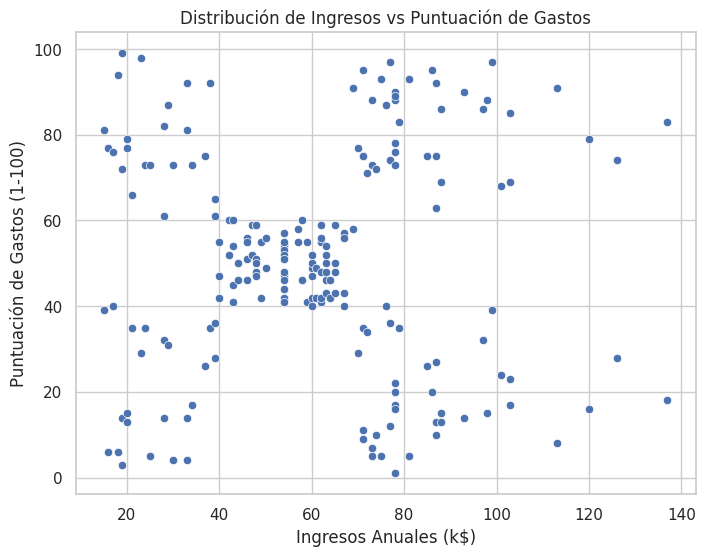

Matriz comparativa para variables:


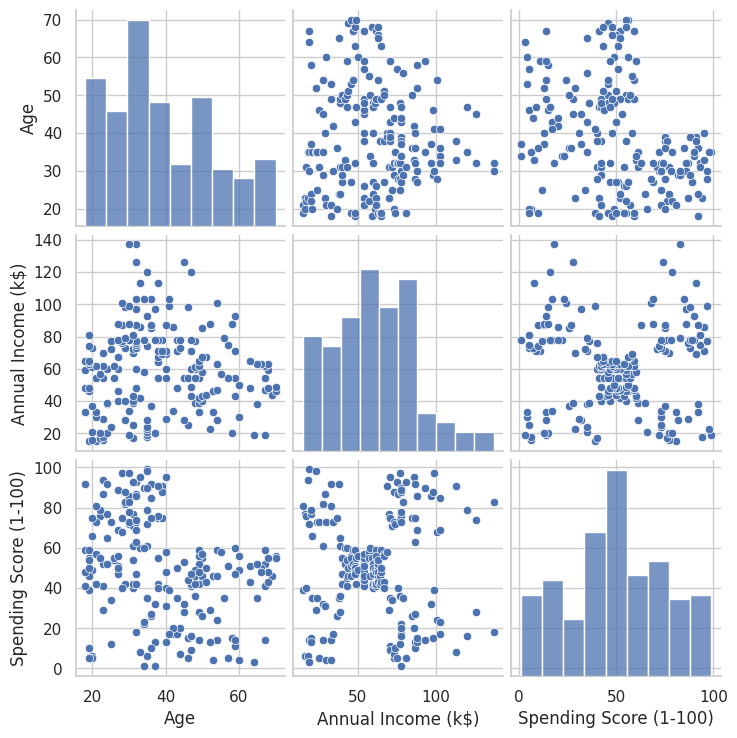

In [8]:
#### c. 

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de dispersión entre Ingresos Anuales y Puntuación de Gastos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mall_data_numeric["Annual Income (k$)"], y=mall_data_numeric["Spending Score (1-100)"])
plt.xlabel("Ingresos Anuales (k$)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.title("Distribución de Ingresos vs Puntuación de Gastos")
plt.show()

# Histogramas de las variables numéricas
#mall_data_numeric.hist(figsize=(12, 6), bins=20, color="skyblue", edgecolor="black")
#plt.suptitle("Histogramas de las Variables Numéricas")
#plt.show()

# Matriz de dispersión para analizar relaciones entre todas las variables numéricas
print("Matriz comparativa para variables:")
sns.pairplot(mall_data_numeric)
plt.show()


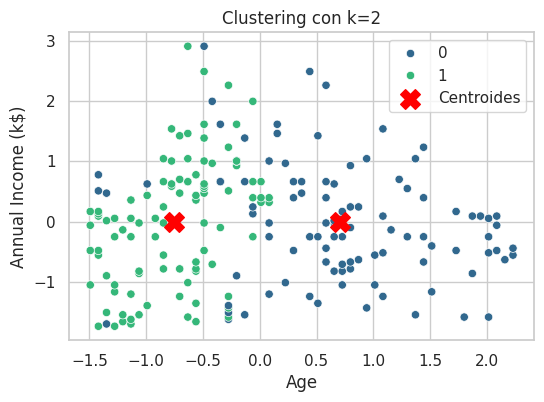

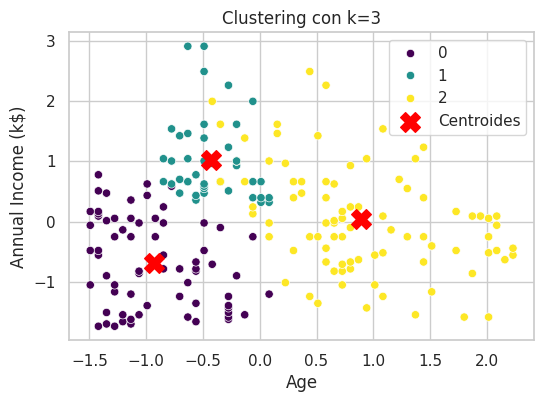

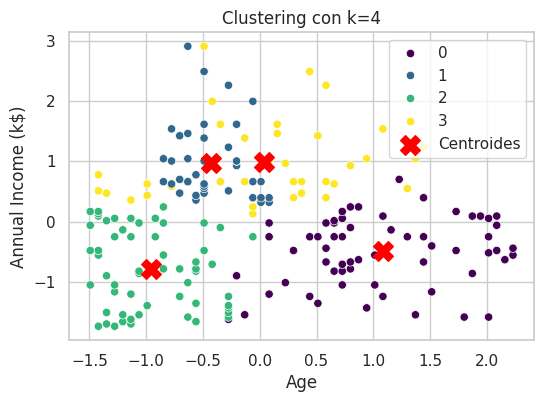

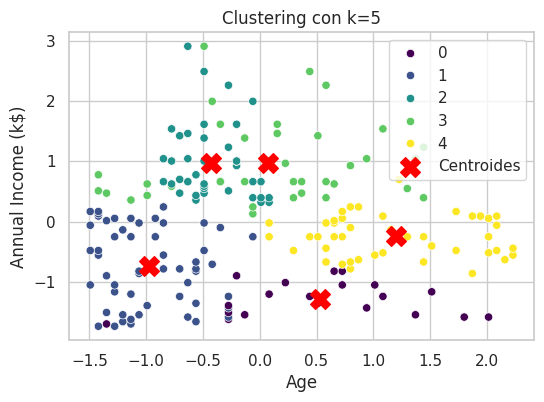

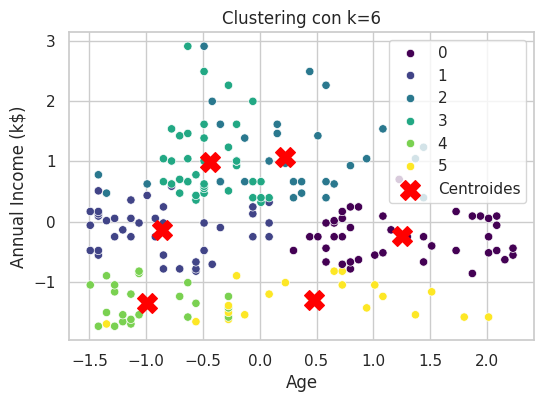

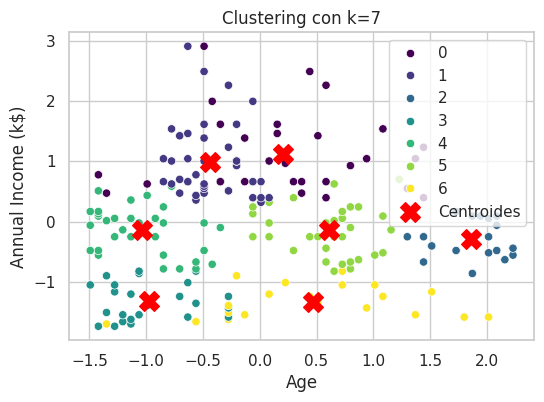

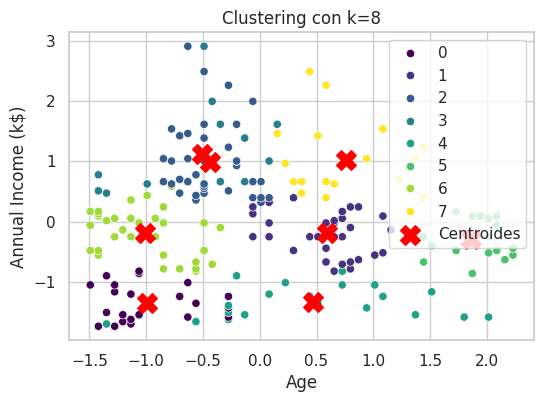

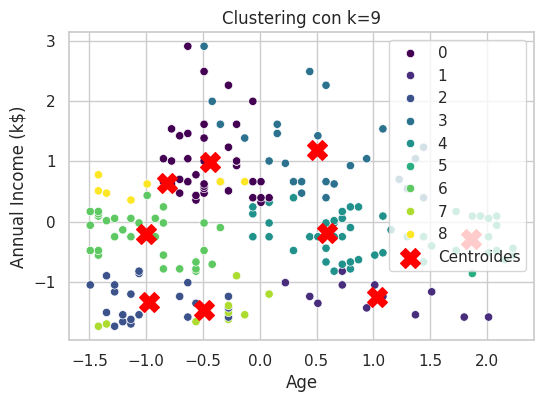

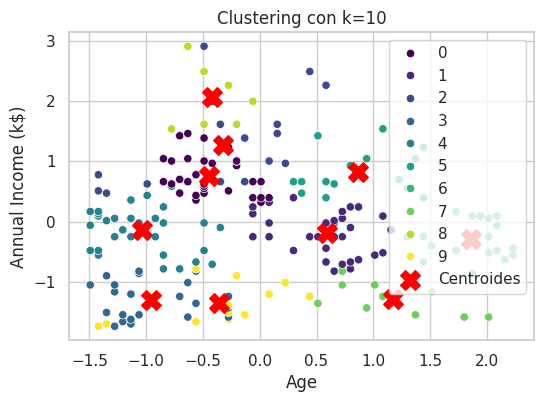

In [12]:
#### d.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Cargar los datos preprocesados
mall_data = pd.read_csv("Mall_Customers.csv")

# Eliminar variables categóricas y normalizar
mall_data_numeric = mall_data.select_dtypes(include=[np.number]).drop(columns=['CustomerID'])
mall_data_centered = mall_data_numeric - mall_data_numeric.mean()
mall_data_standardized = mall_data_centered / mall_data_centered.std()

# Definir rango de clusters
k_values = range(2, 11)
inercia = []  # Lista para almacenar la inercia de cada k

# Aplicar K-Means para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(mall_data_standardized)
    inercia.append(kmeans.inertia_)  # Guardar la inercia para análisis
    
    # Graficar la segmentación con k clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=mall_data_standardized.iloc[:, 0], y=mall_data_standardized.iloc[:, 1], 
                    hue=kmeans.labels_, palette='viridis', legend="full")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centroides')
    plt.title(f'Clustering con k={k}')
    plt.xlabel(mall_data_numeric.columns[0])
    plt.ylabel(mall_data_numeric.columns[1])
    plt.legend()
    plt.show()





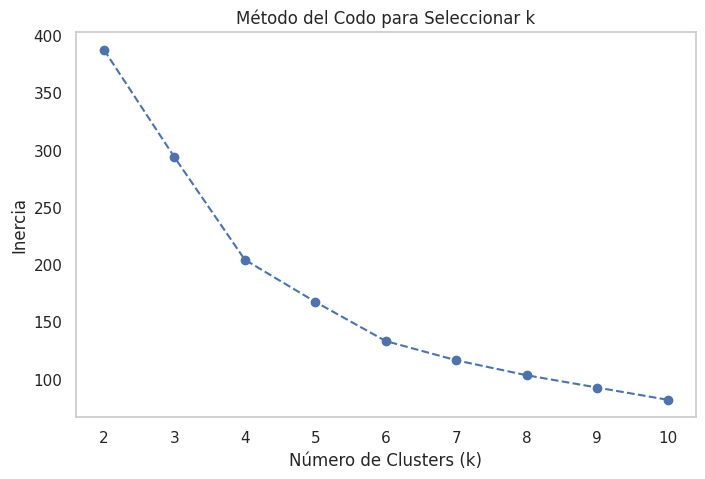

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar los valores de inercia
inercias = []

# Probar valores de k desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(mall_data_standardized)  # Ajustar el modelo a los datos normalizados
    inercias.append(kmeans.inertia_)  # Guardar la inercia del modelo

# Graficar la regla del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inercias, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


El análisis de los resultados obtenidos con K-Means nos permite evaluar la calidad del clustering mediante la regla del codo. Observamos que la inercia disminuye rápidamente para valores pequeños de k, pero luego la reducción se vuelve menos pronunciada. El punto donde la pendiente cambia bruscamente indica el número óptimo de clusters. Si bien K-Means es un método no supervisado, los resultados pueden interpretarse en función de la variabilidad de los datos. Si el número de clusters elegido es muy bajo, se agruparán datos dispares en una misma categoría, reduciendo la precisión. En cambio, si k es demasiado alto, el modelo puede sobreajustarse a los datos y perder generalización. 